In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense,SimpleRNN
from keras.models import Sequential

In [2]:
data=pd.read_csv('./international-airline-passengers.csv',usecols=[1])
df=data.copy()

In [3]:
c_name_1=df.columns[0]
# c_name_2=df.columns[1]

In [4]:
values=df.values.astype('float32')
values.shape

(144, 1)

In [5]:
train_size=int((values.shape[0]*0.67))
test_size=values.shape[0]-train_size
train=values[:train_size]
test=values[train_size:]

In [6]:
print(train.shape)
print(test.shape)

(96, 1)
(48, 1)


In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
train=scaler.fit_transform(train)
test=scaler.transform(test)

In [34]:
train.shape

(96, 1)

In [8]:
def create_dataset(data,k):
    dataX,dataY=[],[]
    for i in range(data.shape[0]-k):
        x=data[i:i+k,0]
        y=data[i+k,0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX),np.array(dataY)    

In [9]:
look_back=12
testX,testY=create_dataset(test,look_back)
trainX,trainY=create_dataset(train,look_back)

In [10]:
trainX.shape

(84, 12)

In [37]:
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX=np.reshape(testX,(testX.shape[0],testX.shape[1],1))

In [38]:
trainX.shape

(84, 12, 1)

In [39]:
#creating Model
model=Sequential()
model.add(SimpleRNN(4,input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=10,batch_size=1)

Epoch 1/10
84/84 [==============================] - 2s 3ms/step - loss: 0.0881
Epoch 2/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0339
Epoch 3/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0200
Epoch 4/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0153
Epoch 5/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 6/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0141
Epoch 7/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0104
Epoch 8/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 9/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 10/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0092


In [40]:
test_pred=model.predict(testX)
test_pred=scaler.inverse_transform(test_pred).ravel()
train_pred=model.predict(trainX)
train_pred=scaler.inverse_transform(train_pred).ravel()
test_true=scaler.inverse_transform([testY]).ravel()
train_true=scaler.inverse_transform([trainY]).ravel()

3/3 [==============================] - 0s 4ms/step


In [41]:
test_pred.shape,test_true.shape

((36,), (36,))

In [27]:
from matplotlib import pyplot as plt

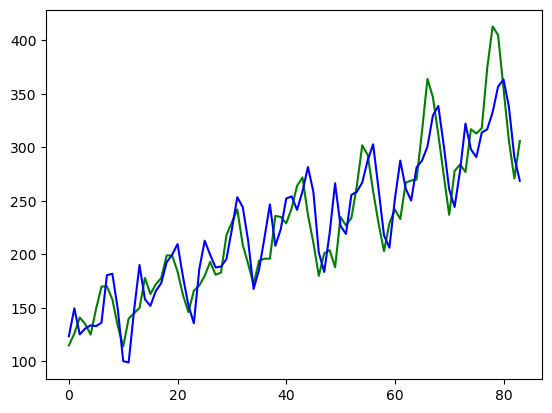

In [42]:
plt.plot(train_true,c='g')
plt.plot(train_pred,c='b')
plt.show()